In [1]:

from openai import OpenAI  # Replace Groq with OpenAI
import networkx as nx

import numpy as np
from scipy import stats as sps
import pandas as pd
np.random.seed(42)

### Networks

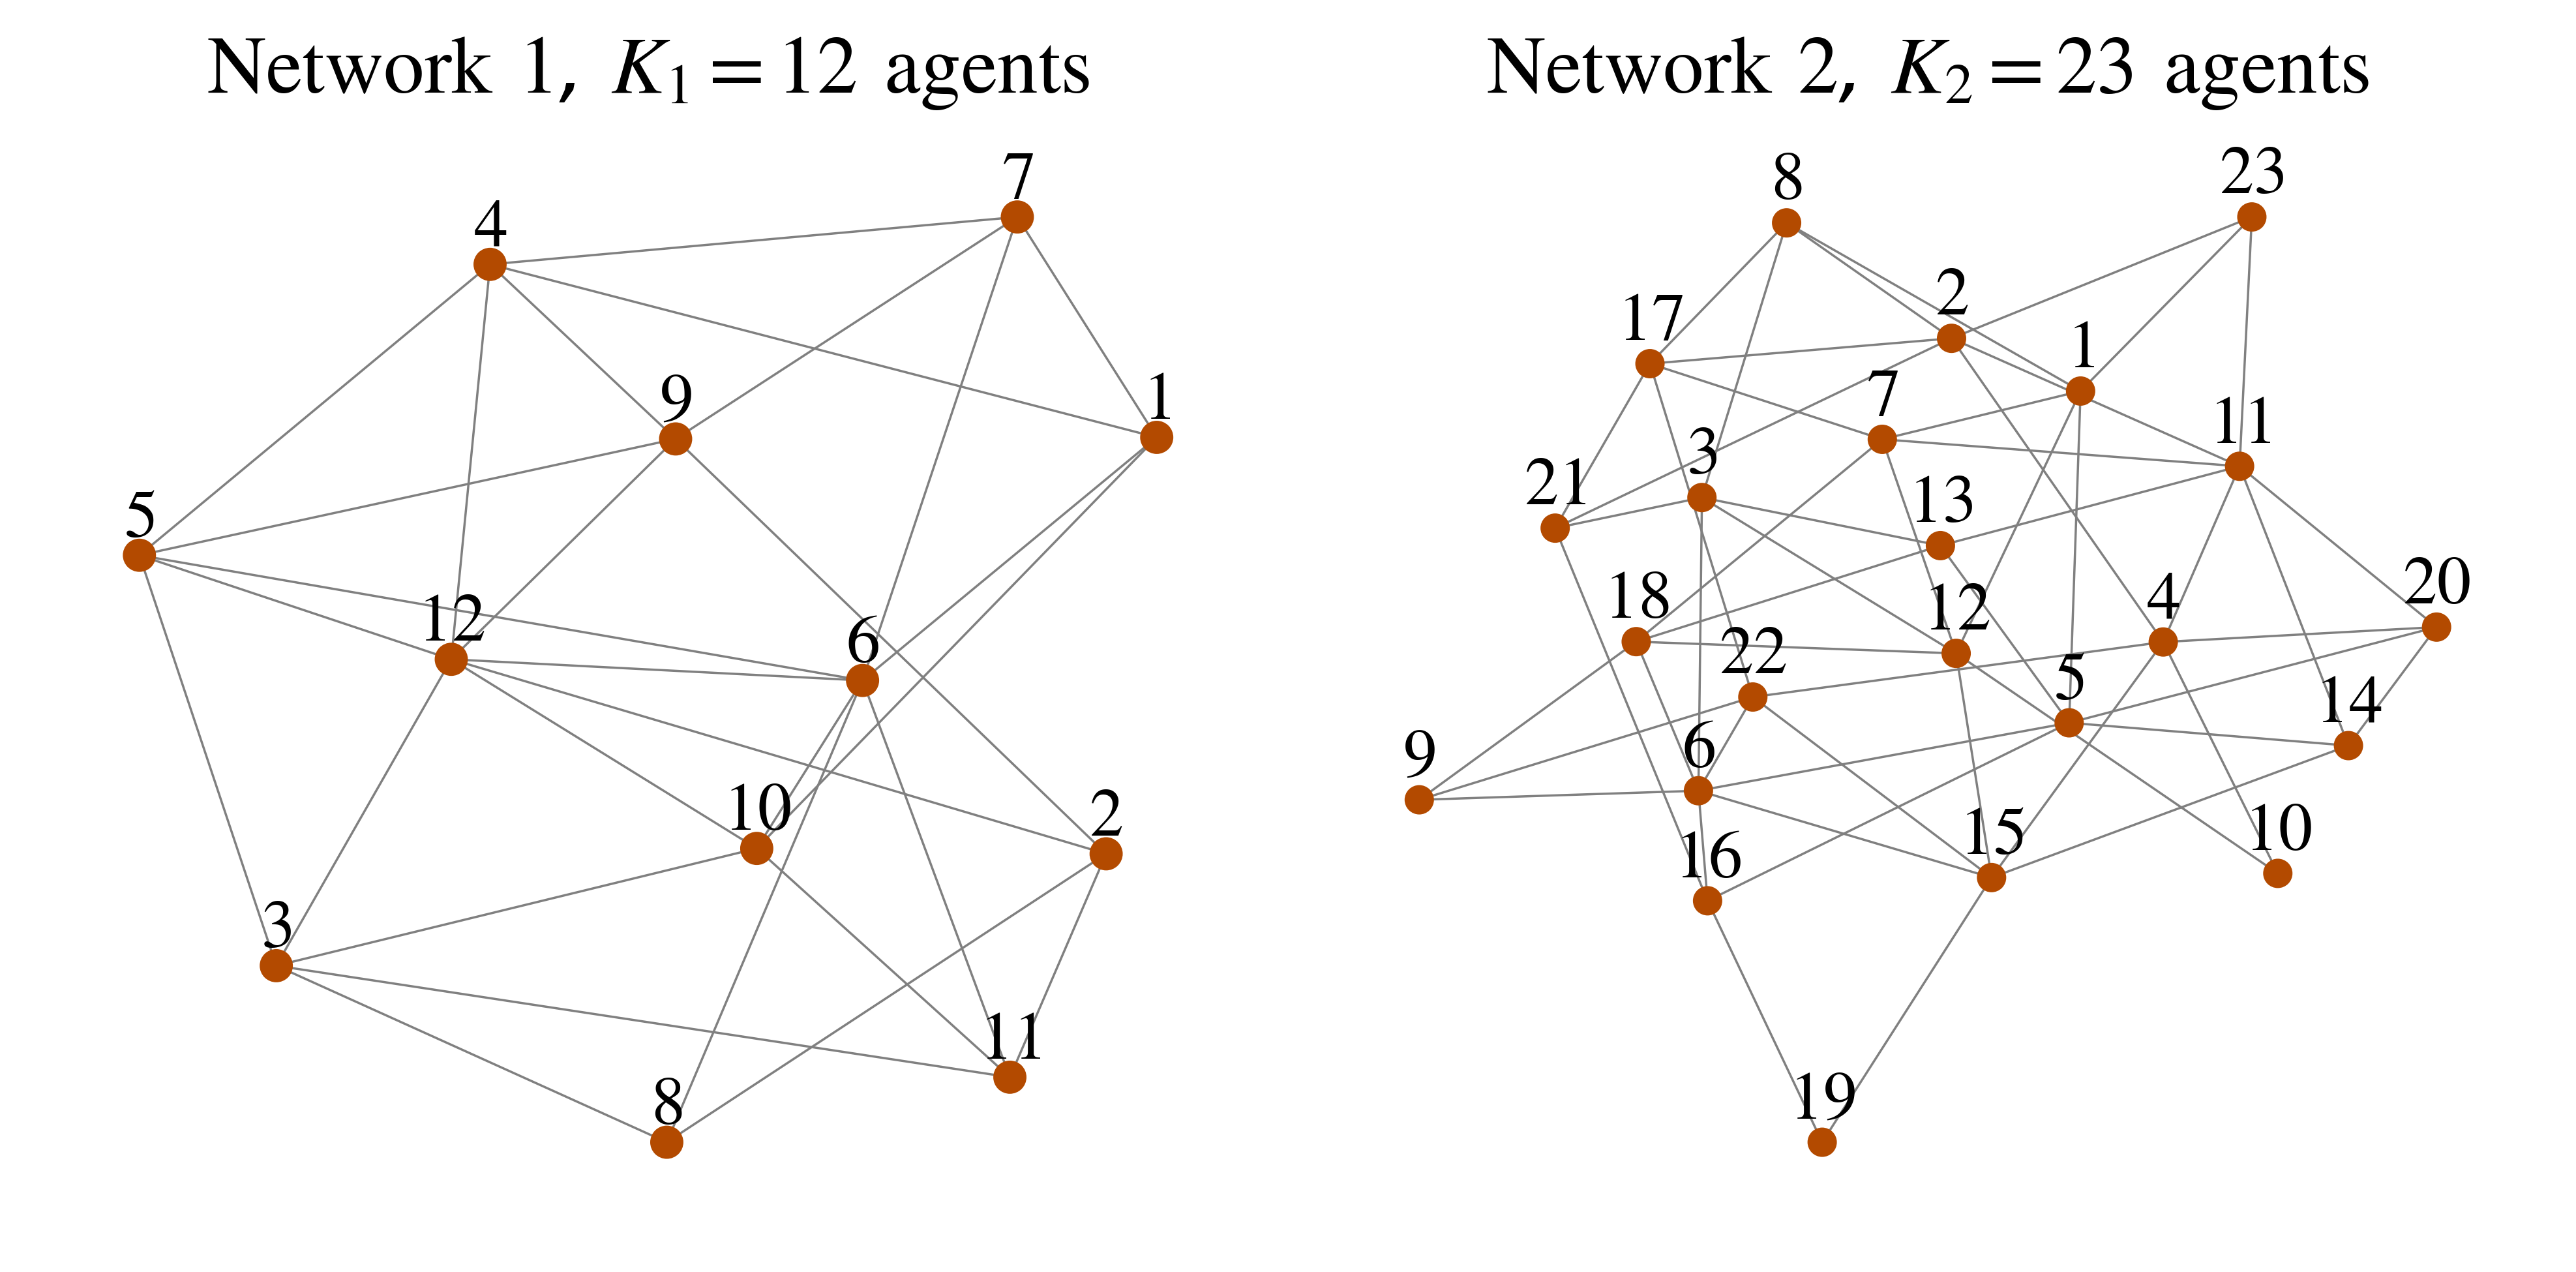

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.rcParams["mathtext.fontset"] = "stix"

def plot_network_on_ax(A, ax, title, label_prefix="$"):
    """
    Plot a graph on the given matplotlib axis with LaTeX-style labels.
    """
    N = A.shape[0]
    G = nx.from_numpy_array(A)
    
    # layout
    sc = 1.5
    pos = nx.spring_layout(G, seed=42, scale=sc, k=40/N, iterations=300)

    # colors
    node_color = (0.7, 0.29, 0.0)
    node_colors = [node_color] * N

    # remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))

    # draw
    nx.draw(
        G, pos,
        node_color=node_colors,
        node_size=40 if N <= 12 else 30,
        edge_color="grey",
        width=0.5,
        arrows=False,
        with_labels=False,
        ax=ax
    )

    # labels
    labels = {i: f"{label_prefix}{i+1}$" for i in range(N)}
    for i, (x, y) in pos.items():
        ax.text(
            x, y + 0.12,  # small vertical shift
            labels[i],
            fontsize=15,
            ha="center", va="center"
        )

    ax.set_title(title, fontsize=18, fontstyle='italic')
    ax.axis("off")


    

network1 = np.array([[0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
 [0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1],
 [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0]])

    
network2 = np.array([[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ],
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, ],
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, ],
[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, ],
[0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, ],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ],
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ],
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, ],
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, ],
[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, ],
[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ],
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ],
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, ],
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ],
[0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ],
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ],
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ],
[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ],
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ],
]
)


fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=500)

plot_network_on_ax(network1, axes[0], r"$\text{Network}$ $1$, $K_1=12$ $\text{agents}$", label_prefix="$")
plot_network_on_ax(network2, axes[1], r"$\text{Network}$ $2$, $K_2=23$ $\text{agents}$", label_prefix="$")

plt.tight_layout()
plt.savefig("figs/networks_side_by_side.pdf", format="pdf", bbox_inches="tight")
plt.show()

### Check trajectories

In [36]:
T_max1 = 15

In [37]:
guess_real = [[] for i in range(2)]

In [38]:
with open("Experiment1/data/interguess", "rb") as f:
    guess_real[0] = np.load(f)

In [39]:
with open("Experiment2/data/interguess", "rb") as f:
    guess_real[1] = np.load(f)

In [40]:
num_samples_done_guess = [10, 10]

In [41]:
real_avg_guess = []
for i in range(2):
    real_avg_guess.append(guess_real[i][:num_samples_done_guess[i]].mean(axis=0)[:T_max1])


In [42]:
ans_noavg = [[] for i in range(2)]
with open("Experiment1/data/NBSL_ans", "rb") as f:
    ans_noavg[0] = np.load(f)
with open("Experiment2/data/NBSL_ans", "rb") as f:
    ans_noavg[1] = np.load(f)

In [43]:
num_samples_done_nbsl = [10, 10]

In [44]:
ans =  [[] for i in range(2)]
for i in range(2):
    ans[i] = ans_noavg[i][:num_samples_done_nbsl[i]].mean(axis=0)[:T_max1]

In [45]:
# Add t=0 initial uniform beliefs
init_belief = np.array([0.333, 0.333, 0.334])

for i in range(2):
    T, N, K = ans[i].shape  # time, agents, categories

    # make initial slice with uniform beliefs for all agents
    init_block = np.tile(init_belief, (N, 1))  # (N, 3)
    init_block = init_block[np.newaxis, :, :]  # shape (1, N, 3)

    # prepend to ans[i]
    ans[i] = np.vstack([init_block, ans[i]])

    # same for real_avg_guess
    T, N, K = real_avg_guess[i].shape
    init_block = np.tile(init_belief, (N, 1))[np.newaxis, :, :]
    real_avg_guess[i] = np.vstack([init_block, real_avg_guess[i]])

In [46]:
colors=['red','b','g', 'orange']

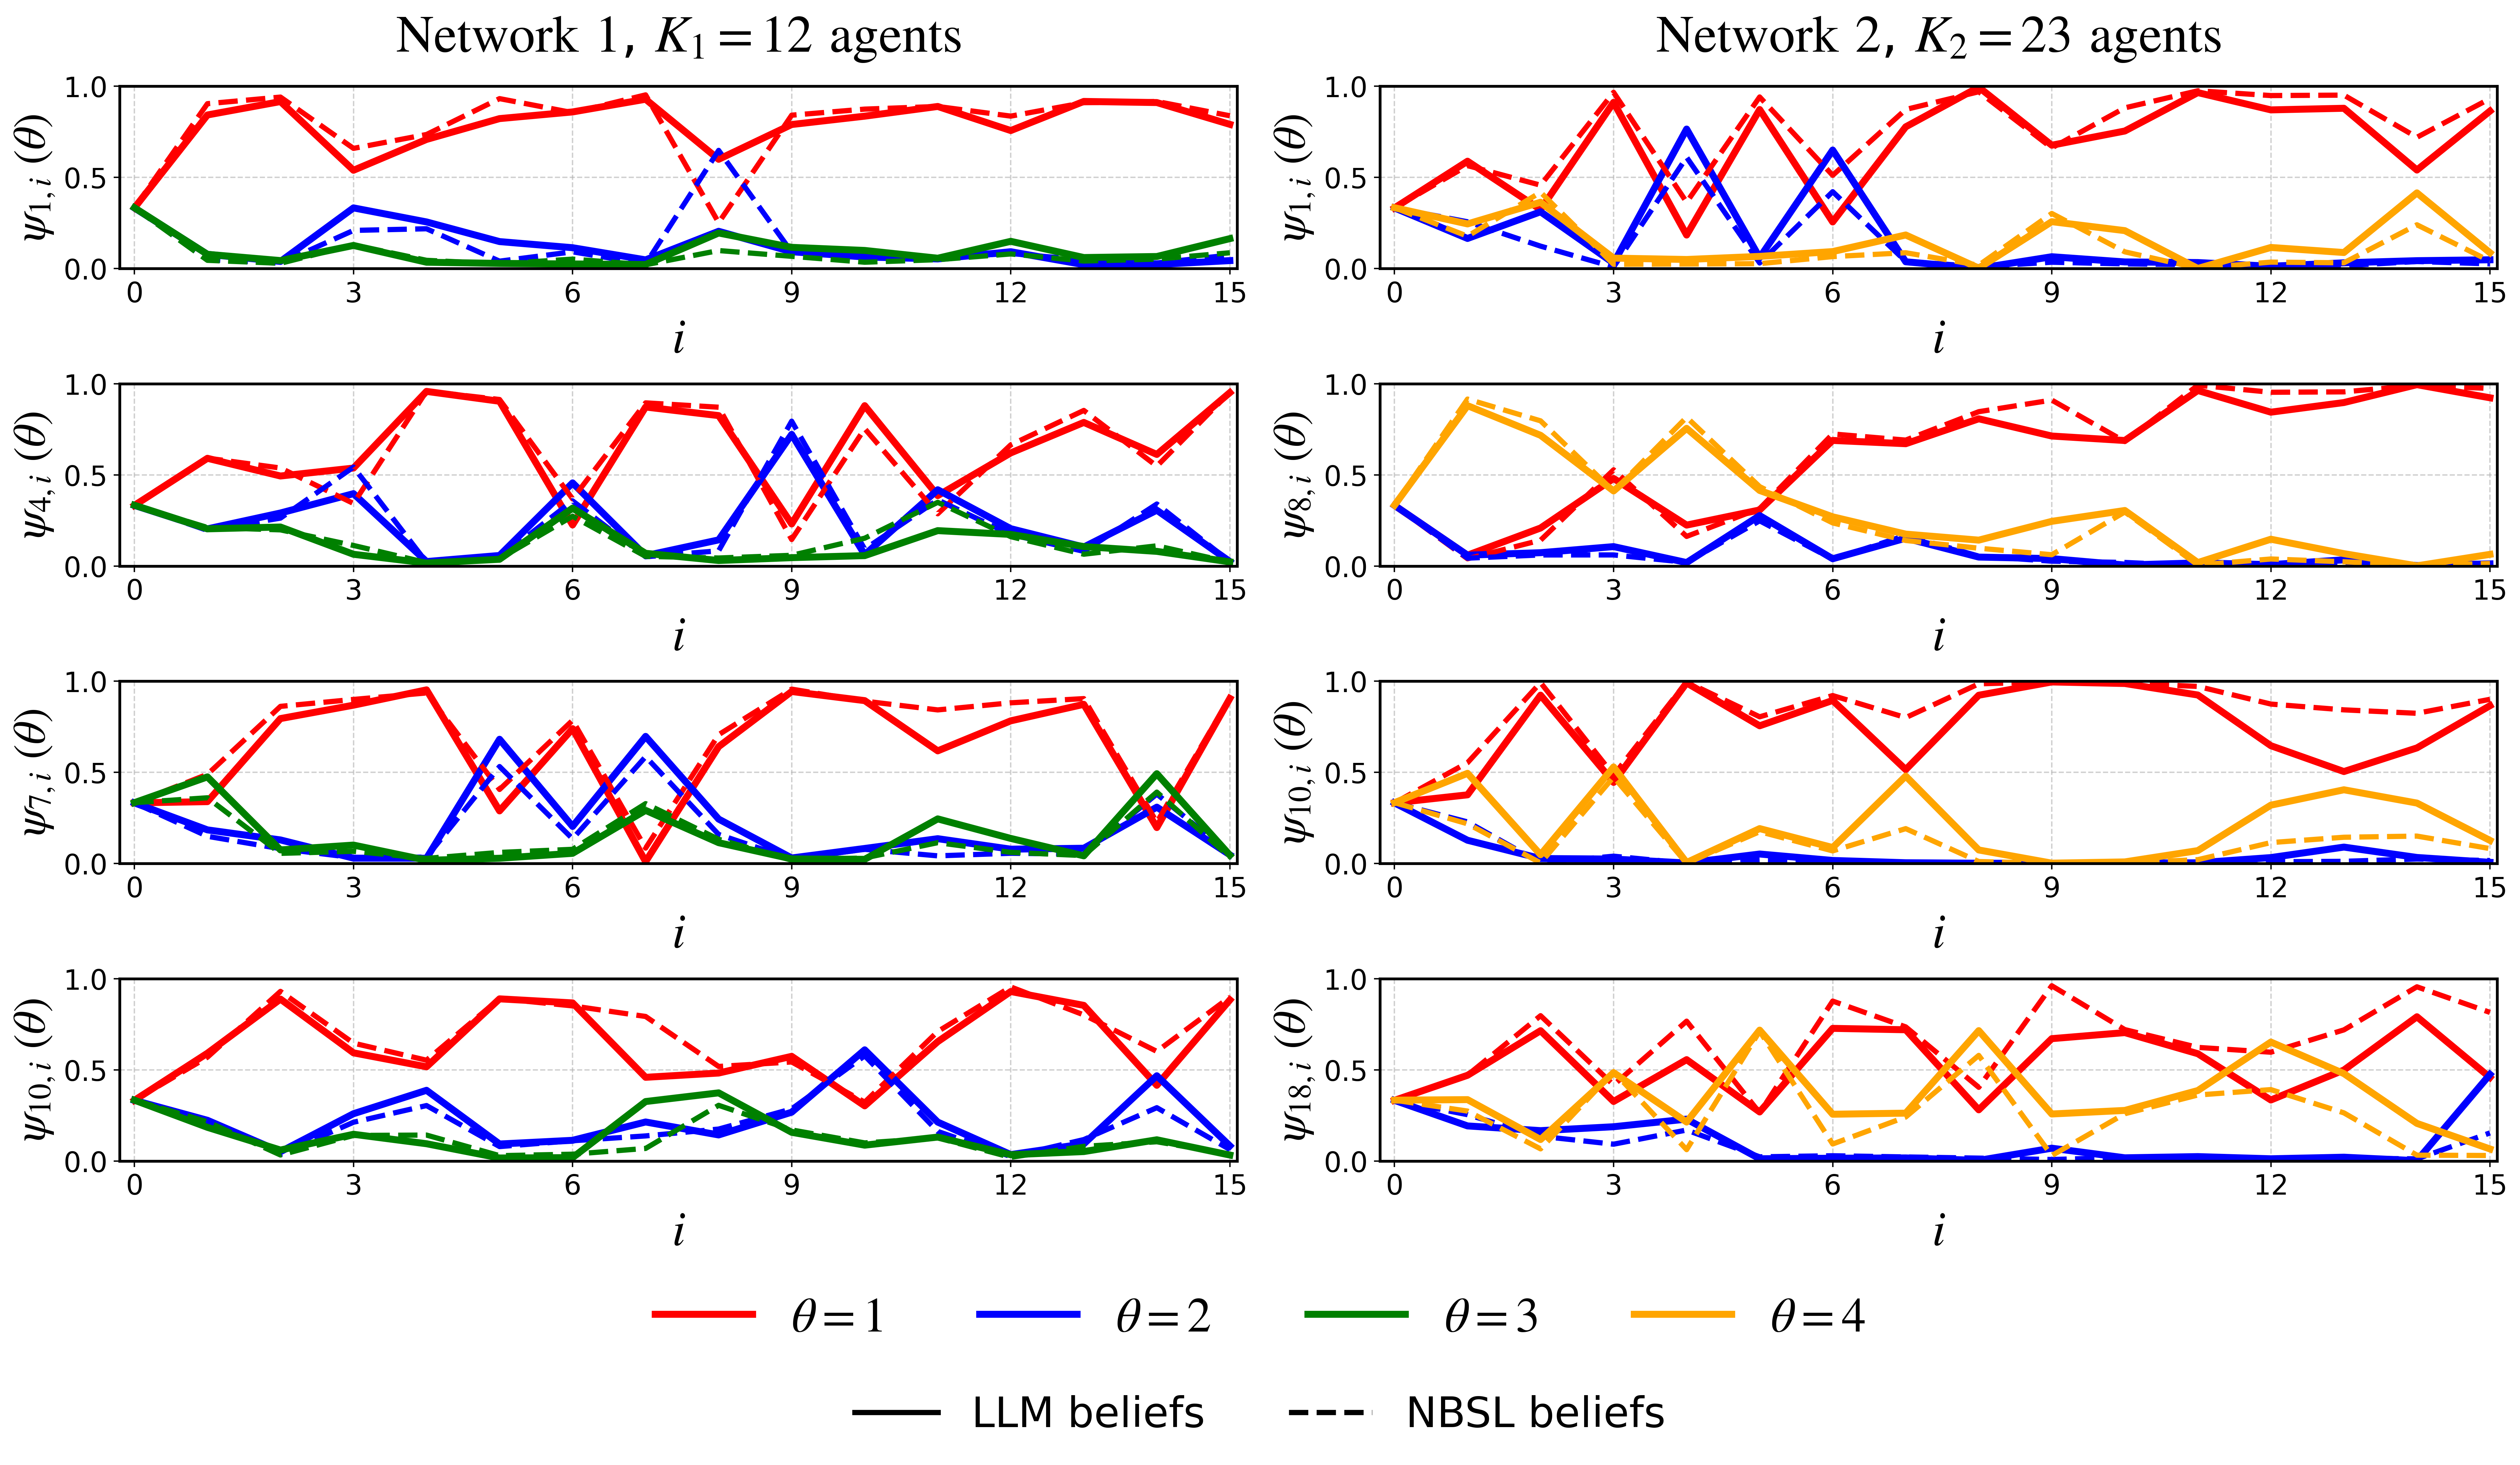

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,MaxNLocator
from matplotlib.lines import Line2D

plt.rcParams["mathtext.fontset"] = "stix"

def plot_beliefs(ans, real_avg_guess, axs, ks, id_netw, use_theta4=False):
    """
    Plot beliefs on given axes.
    If use_theta4=True, replace θ=3 (blue) with θ=4 (yellow).
    """
    for k_id, k in enumerate(ks):
        axs[k_id].plot(real_avg_guess[:, k, 0], color=colors[0],   label=r'$\theta=1$', lw=4)
        axs[k_id].plot(real_avg_guess[:, k, 1], color=colors[1],     label=r'$\theta=2$', lw=4)
        axs[k_id].plot(ans[:, k, 0], color=colors[0],   ls='--', lw=3)
        axs[k_id].plot(ans[:, k, 1], color=colors[1],     ls='--', lw=3)


        if not use_theta4:
            # θ=1 (red), θ=2 (green), θ=4 (yellow instead of θ=3)
            axs[k_id].plot(real_avg_guess[:, k, 2], color=colors[2],  label=r'$\theta=4$', lw=4)
            axs[k_id].plot(ans[:, k, 2], color=colors[2],  ls='--', lw=3)

        else:
            # θ=1 (red), θ=2 (green), θ=3 (blue)
            axs[k_id].plot(real_avg_guess[:, k, 2], color=colors[3],   label=r'$\theta=3$', lw=4)
            axs[k_id].plot(ans[:, k, 2], color=colors[3],   ls='--', lw=3)

        axs[k_id].set_ylim([0, 1])
        axs[k_id].set_xlim([-0.2, 15.1])
        axs[k_id].grid(True, linestyle='--', alpha=0.6)

        axs[k_id].set_xlabel(r"$i$", fontsize=28)
        axs[k_id].set_ylabel(fr"$\psi_{{{k+1},i}}~(\theta)$", fontsize=26)

        axs[k_id].xaxis.set_major_locator(MultipleLocator(3))
        axs[k_id].tick_params(axis='both', which='both', labelsize=16, labelbottom=True)

        for spine in axs[k_id].spines.values():
            spine.set_linewidth(1.6)


# Example indices to show
ks1 = range(0, 12, 3)
ks2 = [0, 7, 9, 17]

fig, axs = plt.subplots(
    max(len(ks1), len(ks2)), 2,  # two columns: left=12 agents, right=23 agents
    figsize=(20, 10),
    sharex=True, constrained_layout=True, dpi=400
)

# Left column (12 agents, θ=1,2,3)
plot_beliefs(ans[0], real_avg_guess[0], axs[:, 0], ks1, 1, use_theta4=False)
axs[0, 0].set_title(r"$\text{Network}$ $1$, $K_1=12$ $\text{agents}$", fontsize=30, pad=20)

# Right column (23 agents, θ=1,2,4)
plot_beliefs(ans[1], real_avg_guess[1], axs[:, 1], ks2, 2, use_theta4=True)
axs[0, 1].set_title(r"$\text{Network}$ $2$, $K_2=23$ $\text{agents}$", fontsize=30, pad=20)

# Legend for θ
# --- legend for θ curves (always show θ=1..4) ---
theta_handles = [
    Line2D([0], [0], color=colors[0],   lw=4, label=r'$\theta=1$'),
    Line2D([0], [0], color=colors[1],     lw=4, label=r'$\theta=2$'),
    Line2D([0], [0], color=colors[2],     lw=4, label=r'$\theta=3$'),
    Line2D([0], [0], color=colors[3],  lw=4, label=r'$\theta=4$')
]

legend1 = fig.legend(
    handles=theta_handles,
    loc="lower center",
    ncol=4,
    fontsize=28,
    frameon=False,
    bbox_to_anchor=(0.5, -0.1)
)

# --- legend for line styles (LLM vs NBSL) ---
style_handles = [
    Line2D([0], [0], color="black", lw=3, linestyle="-",  label="LLM beliefs"),
    Line2D([0], [0], color="black", lw=3, linestyle="--", label="NBSL beliefs")
]

legend2 = fig.legend(
    handles=style_handles,
    loc="lower center",
    ncol=2,
    fontsize=24,
    frameon=False,
    bbox_to_anchor=(0.5, -0.17)
)
plt.savefig("figs/beliefs_side_by_side.pdf", format="pdf", bbox_inches="tight")
plt.show()


### Total variation

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import stats

plt.rcParams["mathtext.fontset"] = "stix"

def total_variation(p, q):
    """TV distance"""
    return np.sum(np.abs(p - q)) / 2


# --- compute  TV for both networks ---
def compute_divs(real_avg_guess, ans):
    T, N, _ = ans.shape
    tv = np.zeros((N, T))
    for k in range(N):
        for t in range(T):
            tv[k, t] = total_variation(real_avg_guess[t, k], ans[t, k])
    tv_avg = tv.mean(axis=0)
    return tv, tv_avg


tv1, tv_avg1 = compute_divs(real_avg_guess[0], ans[0])  # 12 agents
tv2, tv_avg2 = compute_divs(real_avg_guess[1], ans[1])  # 23 agents


# --- helper: t-based 90% CI across agents ---
def t_ci_mean_across_agents(dv, alpha=0.1):
    # dv: shape (N, T)
    N, T = dv.shape
    means = dv.mean(axis=0)
    s = dv.std(axis=0, ddof=1)            # sample std across agents
    sem = s / np.sqrt(N)
    tcrit = stats.t.ppf(1 - alpha/2, df=N-1)
    lower = means - tcrit * sem
    upper = means + tcrit * sem
    return means, lower, upper


# --- plotting helper ---
def plot_divergences_side_by_side(dv1, dv_avg1, dv2, dv_avg2,
                                  ylabel, ylim, fname):
    N1, T1 = dv1.shape
    N2, T2 = dv2.shape

    # compute CIs
    mean1, lower1, upper1 = t_ci_mean_across_agents(dv1, alpha=0.10)
    mean2, lower2, upper2 = t_ci_mean_across_agents(dv2, alpha=0.10)

    fig, axes = plt.subplots(1, 2, figsize=(24, 9), dpi=500, sharey=True)

    
    # left panel
    axes[0].plot(mean1, lw=5, color='black', label="Average")
    axes[0].fill_between(range(T1), lower1, upper1, color='black', alpha=0.15,
                         label="90% CI")
    axes[0].set_title(r"$\text{Network}$ $1$, $K_1=12$ $\text{agents}$", fontsize=48, pad=20)
    axes[0].set_xlabel(r"$i$", fontsize=46)
    axes[0].set_ylabel(ylabel, fontsize=44)
    axes[0].set_xlim([-0.1, T1 - 0.9])
    axes[0].set_ylim(ylim)
    axes[0].grid(True, linestyle="--", alpha=0.6)
    axes[0].tick_params(axis="both", labelsize=30)
    axes[0].xaxis.set_major_locator(MultipleLocator(3))
    axes[0].yaxis.set_tick_params(labelleft=True)

    # right panel
    axes[1].plot(mean2, lw=5, color='black', label="Average")
    axes[1].fill_between(range(T2), lower2, upper2, color='black', alpha=0.15,
                         label="90% CI")
    axes[1].set_title(r"$\text{Network}$ $2$, $K_2=23$ $\text{agents}$", fontsize=48, pad=20)
    axes[1].set_xlabel(r"$i$", fontsize=46)
    axes[1].set_ylabel(ylabel, fontsize=44)
    axes[1].set_xlim([-0.1, T2 - 0.9])
    axes[1].set_ylim(ylim)
    axes[1].grid(True, linestyle="--", alpha=0.6)
    axes[1].tick_params(axis="both", labelsize=30)
    axes[1].xaxis.set_major_locator(MultipleLocator(3))
    axes[1].yaxis.set_tick_params(labelleft=True)

    # --- legend at bottom in two rows ---
    handles, labels = axes[1].get_legend_handles_labels()
    fig.legend(
        handles, labels,
        loc='lower center',
        fontsize=36,
        frameon=True,
        ncol=(len(handles)+1)//2,    # two rows, left to right
        bbox_to_anchor=(0.5, -0.05),
        borderaxespad=0
    )

    for spine in axes[0].spines.values():
        spine.set_linewidth(2)
    for spine in axes[1].spines.values():
        spine.set_linewidth(2)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2, wspace=0.25)  # room for legend
    plt.savefig(fname, format="pdf", bbox_inches="tight")
    plt.show()


In [49]:
plot_divergences_side_by_side(
    tv1, tv_avg1, tv2, tv_avg2,
    ylabel=r"$\widebar{d}_{TV}\left(i\right)$",
    ylim=[0, 0.3],
    fname="figs/TV_side_by_side.pdf"
)


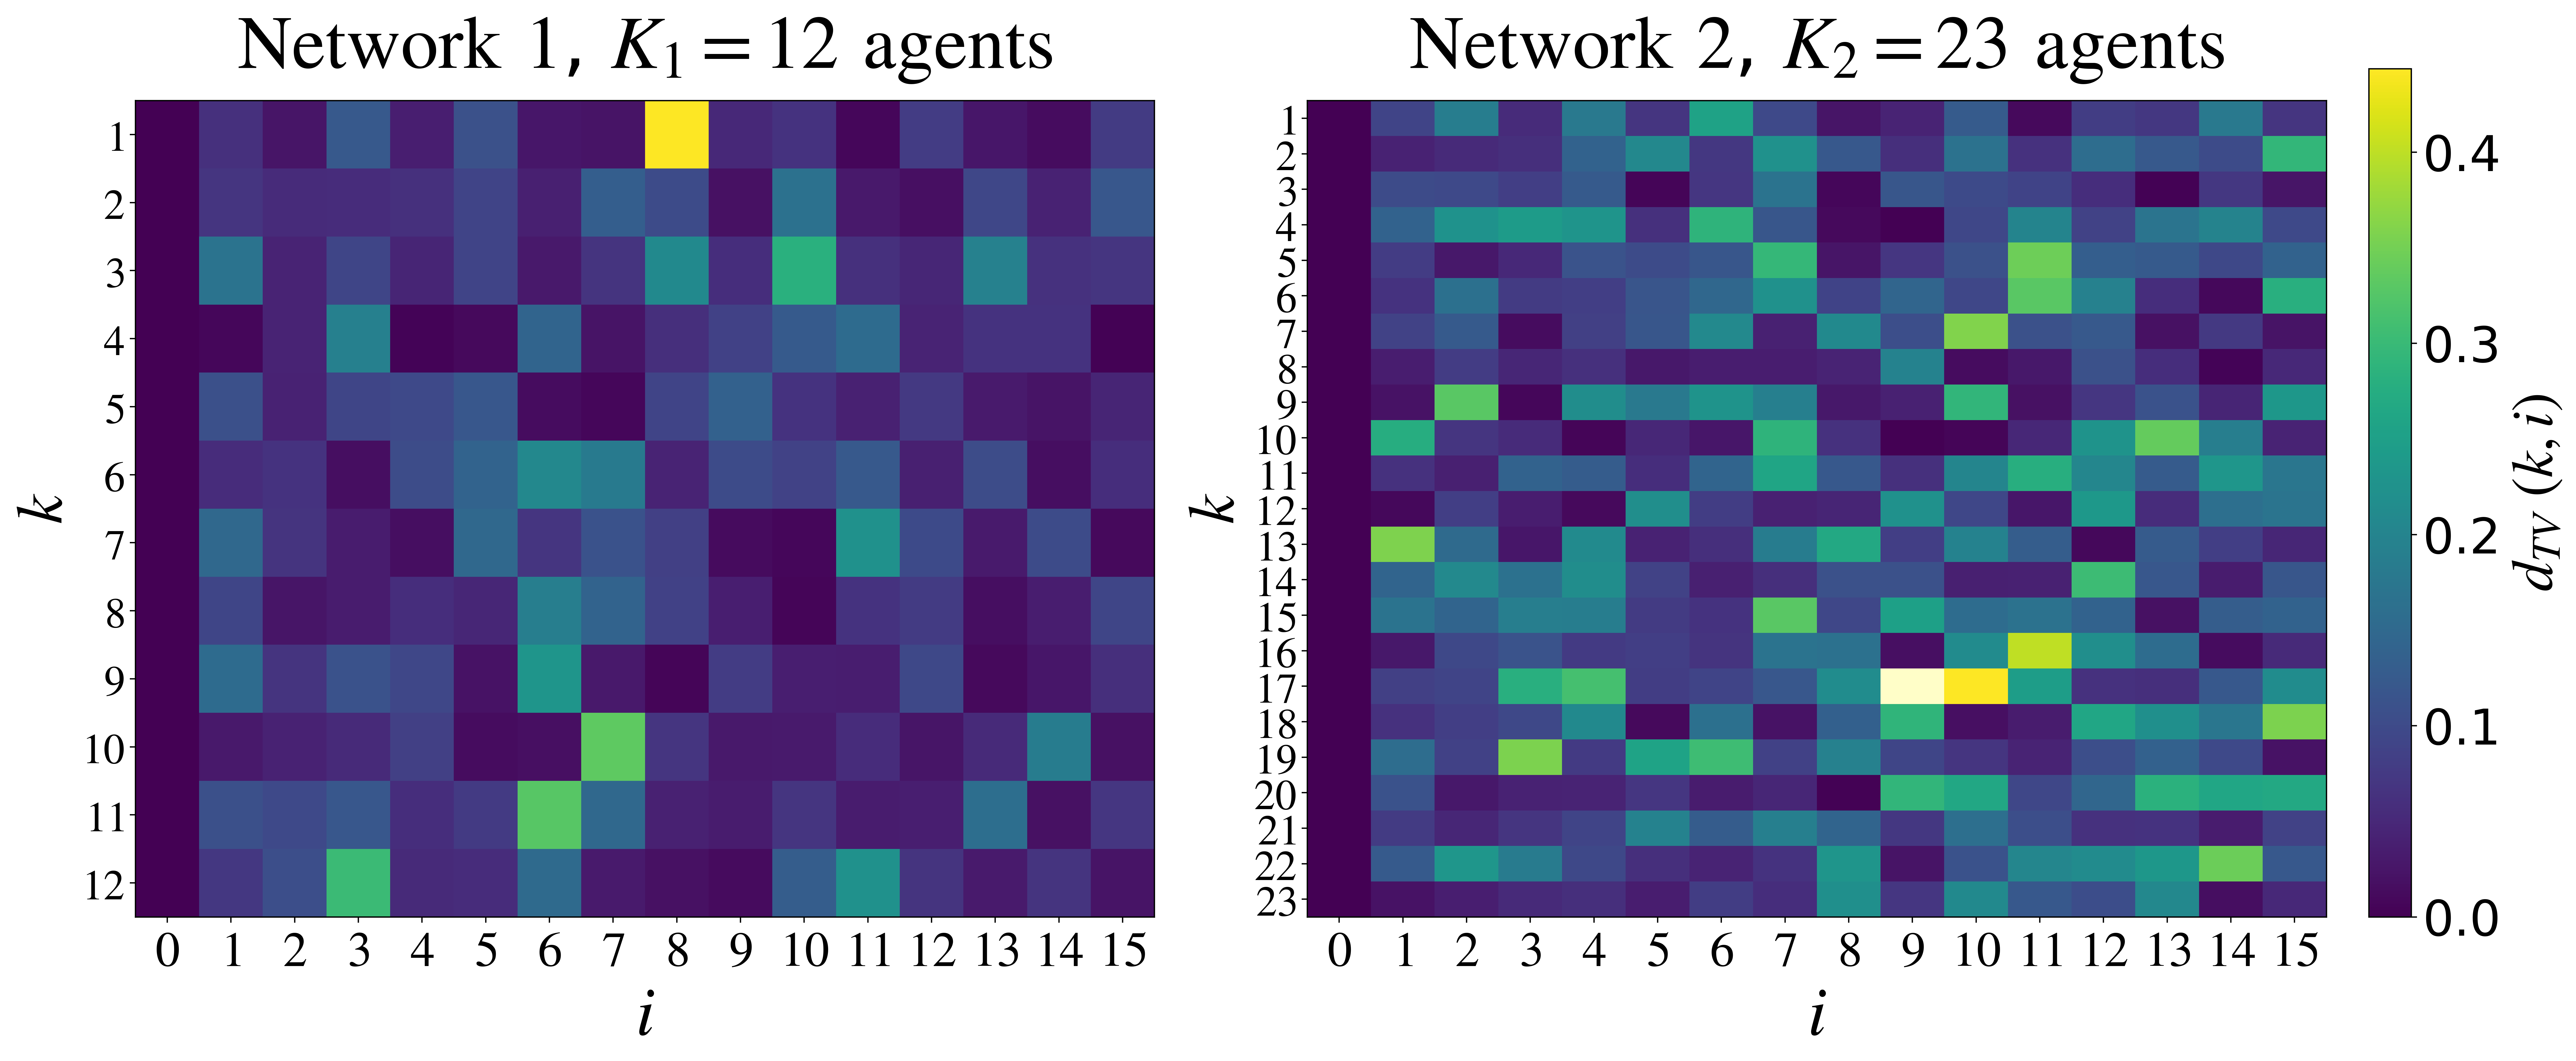

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tv_heatmaps(tv1, tv2, fname="TV_heatmaps.pdf"):
    """
    Plot side-by-side heatmaps of total variation distances.
    Rows = agents, Columns = time steps.
    """
    fig, axes = plt.subplots(1, 2, figsize=(24, 9), dpi=500, sharey=False)

    # copy tv2 and mask the outlier (k=17 -> index 16, t=10 -> index 9)
    tv2_masked = tv2.copy()
    tv2_masked[16, 9] = np.nan
        
    cmap = plt.cm.viridis.copy()
    cmap.set_bad(color="#fffec8")


    # consistent color scale ignoring the outlier
    vmin = np.nanmin([tv1.min(), tv2_masked.min()])
    vmax = np.nanmax([tv1.max(), tv2_masked.max()])

    # left: network 1
    im1 = axes[0].imshow(tv1, aspect="auto", cmap=cmap,
                         interpolation="nearest", origin="upper",
                         vmin=vmin, vmax=vmax)
    axes[0].set_title(r"$\text{Network}$ $1$, $K_1=12$ $\text{agents}$", fontsize=46, pad=20)
    axes[1].set_title(r"$\text{Network}$ $2$, $K_2=23$ $\text{agents}$", fontsize=46, pad=20)

    axes[0].set_yticks(range(tv1.shape[0]))
    axes[0].set_yticklabels([fr"${k+1}$" for k in range(tv1.shape[0])], fontsize=26)
    axes[0].set_ylabel(r"$k$", fontsize=40)
    axes[0].set_xlabel(r"$i$", fontsize=42)

    axes[0].set_xticks(range(tv1.shape[1]))
    axes[0].set_xticklabels([fr"${k}$" for k in range(tv1.shape[1])], fontsize=30)
    axes[0].tick_params(axis="x", labelsize=30)

    # right: network 2
    im2 = axes[1].imshow(tv2_masked, aspect="auto", cmap=cmap,
                     interpolation="nearest", origin="upper",
                     vmin=vmin, vmax=vmax)
    axes[1].set_yticks(range(tv2.shape[0]))
    axes[1].set_yticklabels([fr"${k+1}$" for k in range(tv2.shape[0])], fontsize=26)

    axes[1].set_ylabel(r"$k$", fontsize=40)
    axes[1].set_xlabel(r"$i$", fontsize=42)

    axes[1].set_xticks(range(tv2.shape[1]))
    axes[1].set_xticklabels([fr"${k}$" for k in range(tv2.shape[1])], fontsize=30)
    axes[1].tick_params(axis="x", labelsize=30)


    # shared colorbar
    cbar_ax = fig.add_axes([0.915, 0.11, 0.015, 0.8])  # x, y, width, height
    cbar = fig.colorbar(im2, cax=cbar_ax)

    cbar.ax.tick_params(labelsize=30)

    cbar.set_ticks([vmin, 0.1, 0.2, 0.3, 0.4])

    # add label with larger font
    cbar.set_label(r"$d_{TV}~\left(k, i\right)$", fontsize=36)
    
    plt.subplots_adjust(right=0.9, wspace=0.15)
    plt.savefig(fname, format="pdf", bbox_inches="tight")
    plt.show()


# --- call the function ---
plot_tv_heatmaps(tv1, tv2, fname="figs/TV_heatmaps.pdf")